# CREDIT SCORE CLASSIFICATION

## OBJECTIVE
Develop a robust machine learning model to accurately predict credit scores based on various financial and personal attributes. This model will automate the assessment of creditworthiness, enabling more efficient and data-driven decision-making in credit-related processes.


## DATASET OVERVIEW

The Data is already splited as test and train .
Train Data contains 100000 Rows and 28 columns.
Test Data contains 50000 Rows and 27 columns.

| Variable | Description |
| --- | --- |
|ID| Unique identifier for each record in the dataset|
|Customer_ID| Unique identifier assigned to each customer|
|Month| The month for which the data is recorded|
|Name| The name of the customer|
|Age| The age of the customer|
|SSN| The Social Security Number of the customer|
|Occupation|The occupation of the customer|
|Annual_Income| The annual income of the customer|
|Monthly_Inhand_Salary|The monthly in-hand salary of the customer|
|Num_Bank_Accounts| The number of bank accounts the customer has|
|Num_Credit_Card|The number of credit cards the customer possesses|
|Interest_Rate| The interest rate applied to the customer’s loans or credit|
|Num_of_Loan|The number of loans the customer has taken|
|Type_of_Loan| The type of loans the customer has taken|
|Delay_from_due_date|The delay from the due date for loan repayments or credit card payments|
|Num_of_Delayed_Payment|The number of delayed payments made by the customer|
|Changed_Credit_Limit|The number of times the credit limit has been changed for the customer|
|Num_Credit_Inquiries|The number of credit inquiries made for the customer|
|Credit_Mix| The mix of different types of credit the customer has|
|Outstanding_Debt| The total outstanding debt of the customer|
|Credit_Utilization_Ratio| The ratio of the customer’s credit utilization|
|Credit_History_Age|The age of the customer’s credit history|
|Payment_of_Min_Amount| Indicates whether the customer pays the minimum amount due or not|
|Total_EMI_per_month|The total EMI (Equated Monthly Installment) paid by the customer per month|
|Amount_invested_monthly| The amount invested by the customer on a monthly basis|
|Payment_Behaviour|The customer’s payment behavior|
|Monthly_Balance| The monthly balance in the customer’s account|
|Credit_Score|The credit score of the customer|

Here Credit_Score is the target variable

## IMPORTANT LIBRARIES

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


## LOAD DATASET

In [10]:
# Load the training and testing datasets
train_df = pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/CREDIT  SCORE/Data/train.csv")
test_df = pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/CREDIT  SCORE/Data/test.csv")


In [11]:
train_df.shape

(100000, 28)

In [13]:
test_df.shape

(50000, 27)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [16]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [17]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


## DATA CLEANING AND PREPROCESSING

In [19]:
# Create a copy to preserve original data
train_clean = train_df.copy()
test_clean = test_df.copy()

In [22]:
# Combine train and test for consistent preprocessing
train_clean['is_train'] = 1
test_clean['is_train'] = 0
test_clean['Credit_Score'] = np.nan  # Add placeholder target column

combined = pd.concat([train_clean, test_clean], ignore_index=True)

In [24]:
combined.shape

(150000, 29)

In [27]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [28]:
combined.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,is_train
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,147000.000000,150000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,28.529014,32.283309,1432.513579,0.666667
std,3180.489657,117.069476,129.143006,461.537193,14.860154,194.456058,5.113315,8403.759977,0.471406
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,3.000000,28.054731,30.947775,0.000000
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,6.000000,32.297058,71.280006,1.000000
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,9.000000,36.487954,166.279555,1.000000
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2597.000000,50.000000,82398.000000,1.000000


In [31]:
combined.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit            0
Num_Credit_Inquiries         3000
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour               0
Monthly_Balance              1762
Credit_Score                50000
is_train                        0
dtype: int64

In [35]:
# DataFrame Null Values as Percentages
null_percentage = combined.isnull().mean() * 100
print(null_percentage)

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                        10.000000
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.408000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.000000
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         2.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.500000
Payment_Behaviour            0.000000
Monthly_Bala

Here Some columns have missing data, they are Name,Monthly_Inhand_Salary,Type_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_History_Age,Amount_invested_monthly ,Monthly_Balance. where Credit_Score is the target vaiable  present only in train dataset. 

Some numerical columns are erroneously typed as object, so we want to convert them

In [42]:
import re

# Utility function to safely convert to numeric
def safe_to_numeric(series):
    return pd.to_numeric(series.astype(str).str.replace(r"[^\d.]", "", regex=True), errors='coerce')

# Clean numeric columns
numeric_columns = [
    "Age", "Annual_Income", "Outstanding_Debt",
    "Amount_invested_monthly", "Monthly_Balance",
    "Changed_Credit_Limit", "Num_of_Delayed_Payment"
]

for col in numeric_columns:
    combined[col] = safe_to_numeric(combined[col])

In [43]:
# fix invalid data
## some values in the age column have negative value which is not possible
 
combined.loc[(combined["Age"] < 0) | (combined["Age"] > 100), "Age"] = np.nan

In [44]:
# Clean 'Credit_History_Age' from "22 Years and 1 Months" -> total months
def convert_credit_history_age(value):
    try:
        if isinstance(value, str):
            years = int(value.split("Years")[0].strip())
            months = int(value.split("and")[1].split("Months")[0].strip())
            return years * 12 + months
    except:
        return np.nan

combined['Credit_History_Age'] = combined['Credit_History_Age'].apply(convert_credit_history_age)

In [45]:
# Drop irrelevant or redundant columns
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month']
combined.drop(columns=columns_to_drop, axis=1, inplace=True)

In [46]:
# Clean categorical columns: map "NM" to NaN and strip whitespace
categorical_columns = ["Payment_of_Min_Amount", "Credit_Mix", "Occupation"]
for col in categorical_columns:
    combined[col] = combined[col].replace("NM", np.nan).str.strip()

In [47]:
# Fill missing values with median for numerical columns
for col in combined.select_dtypes(include=[np.number]).columns:
    combined[col] = combined[col].fillna(combined[col].median())


In [48]:
# Fill missing values with mode for categorical columns
for col in combined.select_dtypes(include=['object']).columns:
    combined[col] = combined[col].fillna(combined[col].mode()[0])

In [49]:
# Confirm cleaning success
cleaned_sample = combined[numeric_columns + ['Credit_History_Age'] + categorical_columns].head()
missing_summary = combined.isnull().sum()

(cleaned_sample, missing_summary[missing_summary > 0])

(    Age  Annual_Income  Outstanding_Debt  Amount_invested_monthly  \
 0  23.0       19114.12            809.98                80.415295   
 1  23.0       19114.12            809.98               118.280222   
 2  33.0       19114.12            809.98                81.699521   
 3  23.0       19114.12            809.98               199.458074   
 4  23.0       19114.12            809.98                41.420153   
 
    Monthly_Balance  Changed_Credit_Limit  Num_of_Delayed_Payment  \
 0       312.494089                 11.27                     7.0   
 1       284.629162                 11.27                    14.0   
 2       331.209863                  9.41                     7.0   
 3       223.451310                  6.27                     4.0   
 4       341.489231                 11.27                    14.0   
 
    Credit_History_Age Payment_of_Min_Amount Credit_Mix Occupation  
 0               265.0                    No          _  Scientist  
 1               222.0  

In [52]:
# Check cleaned data types and missing values
cleaned_dtypes = combined.dtypes

cleaned_dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
is_train                      int64
dtype: object

In [53]:
# Check cleaned data types and missing values
missing_values = combined.isnull().sum().sort_values(ascending=False)
missing_values

Age                         0
Occupation                  0
Credit_Score                0
Monthly_Balance             0
Payment_Behaviour           0
Amount_invested_monthly     0
Total_EMI_per_month         0
Payment_of_Min_Amount       0
Credit_History_Age          0
Credit_Utilization_Ratio    0
Outstanding_Debt            0
Credit_Mix                  0
Num_Credit_Inquiries        0
Changed_Credit_Limit        0
Num_of_Delayed_Payment      0
Delay_from_due_date         0
Type_of_Loan                0
Num_of_Loan                 0
Interest_Rate               0
Num_Credit_Card             0
Num_Bank_Accounts           0
Monthly_Inhand_Salary       0
Annual_Income               0
is_train                    0
dtype: int64

## EXPLORATORY DATA ANALYSIS

#### CREDIT SCORE DISTRIBUTION

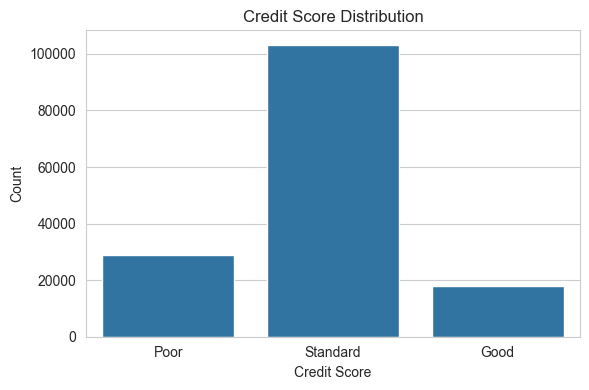

In [64]:
# Set plot style
sns.set_style("whitegrid")
# Credit Score Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=combined, x='Credit_Score', order=['Poor', 'Standard', 'Good'])
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

There are three classes: Poor, Standard, and Good.Distribution appears slightly imbalanced, possibly with Standard being the most frequent.

#### AGE DISTRIBUTION BY CREDIT SCORE

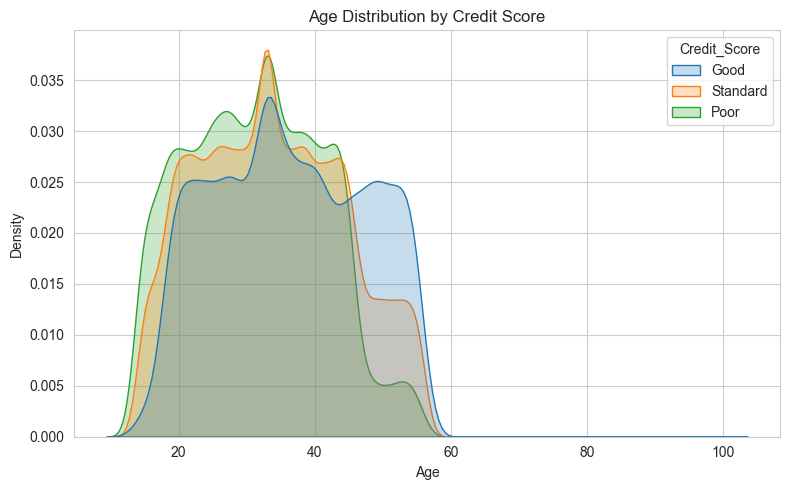

In [67]:
# Age Distribution by Credit Score
plt.figure(figsize=(8, 5))
sns.kdeplot(data=combined, x='Age', hue='Credit_Score', fill=True, common_norm=False)
plt.title("Age Distribution by Credit Score")
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


Good credit scores are more common in individuals aged 30 to 50.Poor credit scores have a wider age spread but are more frequent under 30.
Age is correlated with financial maturity — older individuals likely have more stable histories.

#### ANNUAL INCOME DISTRIBUTION BY  CREDIT SCORE

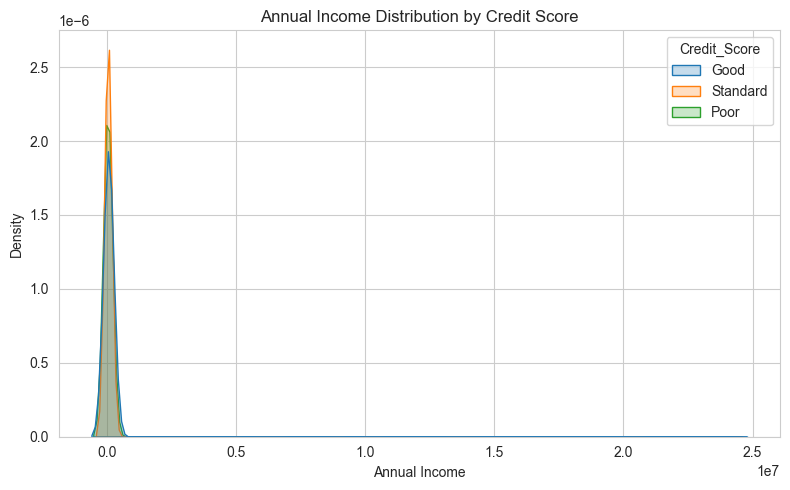

In [71]:
# Annual Income Distribution by Credit Score
plt.figure(figsize=(8, 5))
sns.kdeplot(data=combined, x='Annual_Income', hue='Credit_Score', fill=True, common_norm=False)
plt.title("Annual Income Distribution by Credit Score")
plt.xlabel("Annual Income")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Higher income individuals tend to have better credit scores.Poor credit is more dense in the lower-income group.Income is a strong positive indicator of creditworthiness.

#### OUTSTANDING DEBT BY CREDIT SCORE

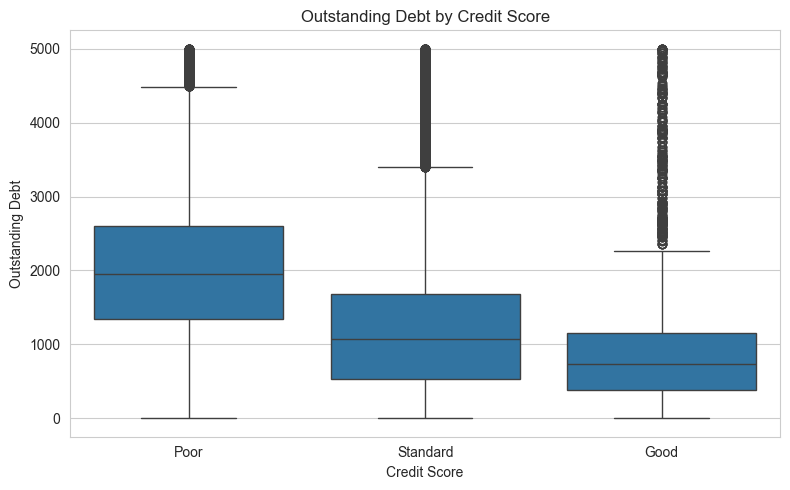

In [74]:
# Outstanding Debt by Credit Score
plt.figure(figsize=(8, 5))
sns.boxplot(data=combined, x='Credit_Score', y='Outstanding_Debt', order=['Poor', 'Standard', 'Good'])
plt.title("Outstanding Debt by Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Outstanding Debt")
plt.tight_layout()
plt.show()

Individuals with Good scores have lower median debt and less spread.Poor scores are associated with higher and more variable outstanding debt.Debt level and stability are key features. High or volatile debt relates to poor scores.

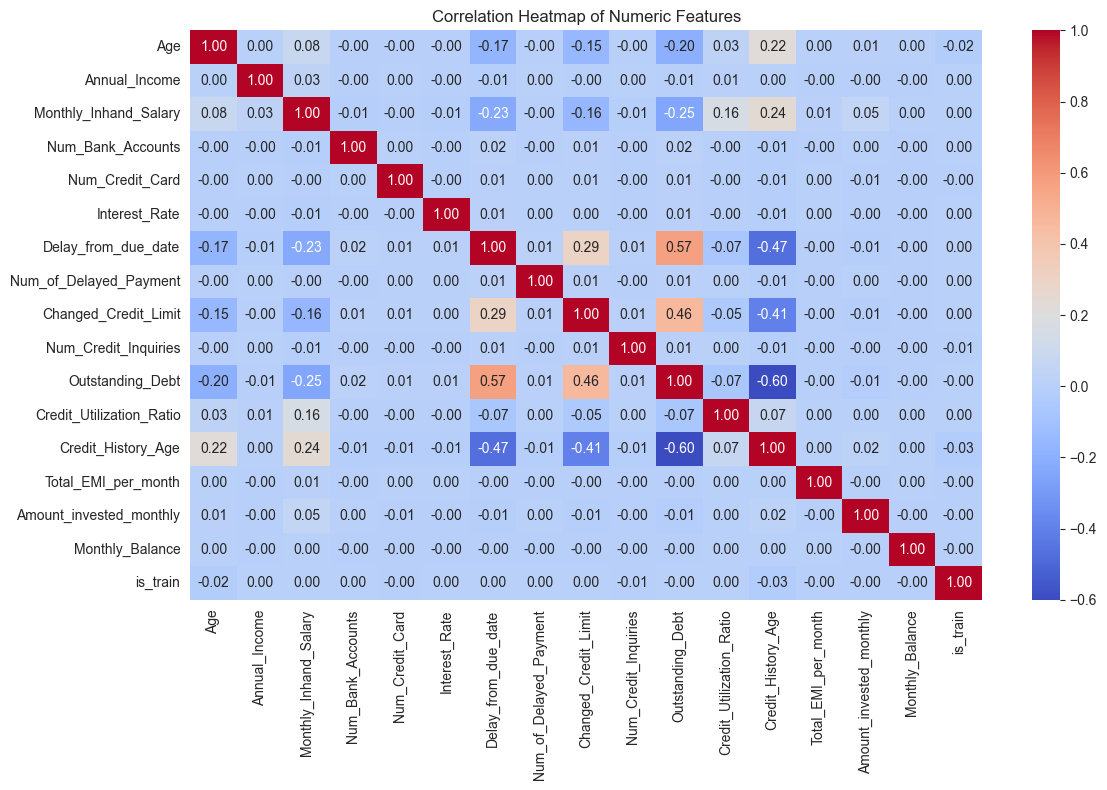

In [76]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = combined.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

Annual_Income is Highly correlated with:Amount_invested_monthly ,Monthly_Balance People with higher income invest more i.e.More income = more savings.
it is a Good predictor of financial stability.it Could cause multicollinearity with investment and balance.

Amount_invested_monthly has a Strong correlation with Annual_Income and Monthly_Balance

Monthly_Balance has a Strong positive correlation with Amount_invested_monthly and Annual_Income also have a  negative correlation with Num_of_Delayed_Payment.this Likely a top feature in predicting good credit scores.

Num_of_Delayed_Payment is Often negatively correlated with Monthly_Balance, Annual_Income, and Investment.this Indicates poor credit behavior.
and is a Strong negative predictor of good credit score.


Outstanding_Debt is correlate with Num_of_Loan,Changed_Credit_Limit. so High debt without high income might indicate credit risk.


Num_of_Loan is Moderate to high correlation with Outstanding_Debt.

Changed_Credit_Limit is Correlates with Outstanding_Debt. this may indicate unstable or dynamic financial behavior and it could mean flexible credit profile or credit instability depending on context.


Credit_History_Age_Months have a Mild positive correlation with Age, Income, Loan Count.Older credit history often signals trustworthy behavior.

Age have a Mild correlationsWith Credit_History_Age_Months and slight with Delayed_Payment. It is not strongly correlated with most features — might have independent predictive power.



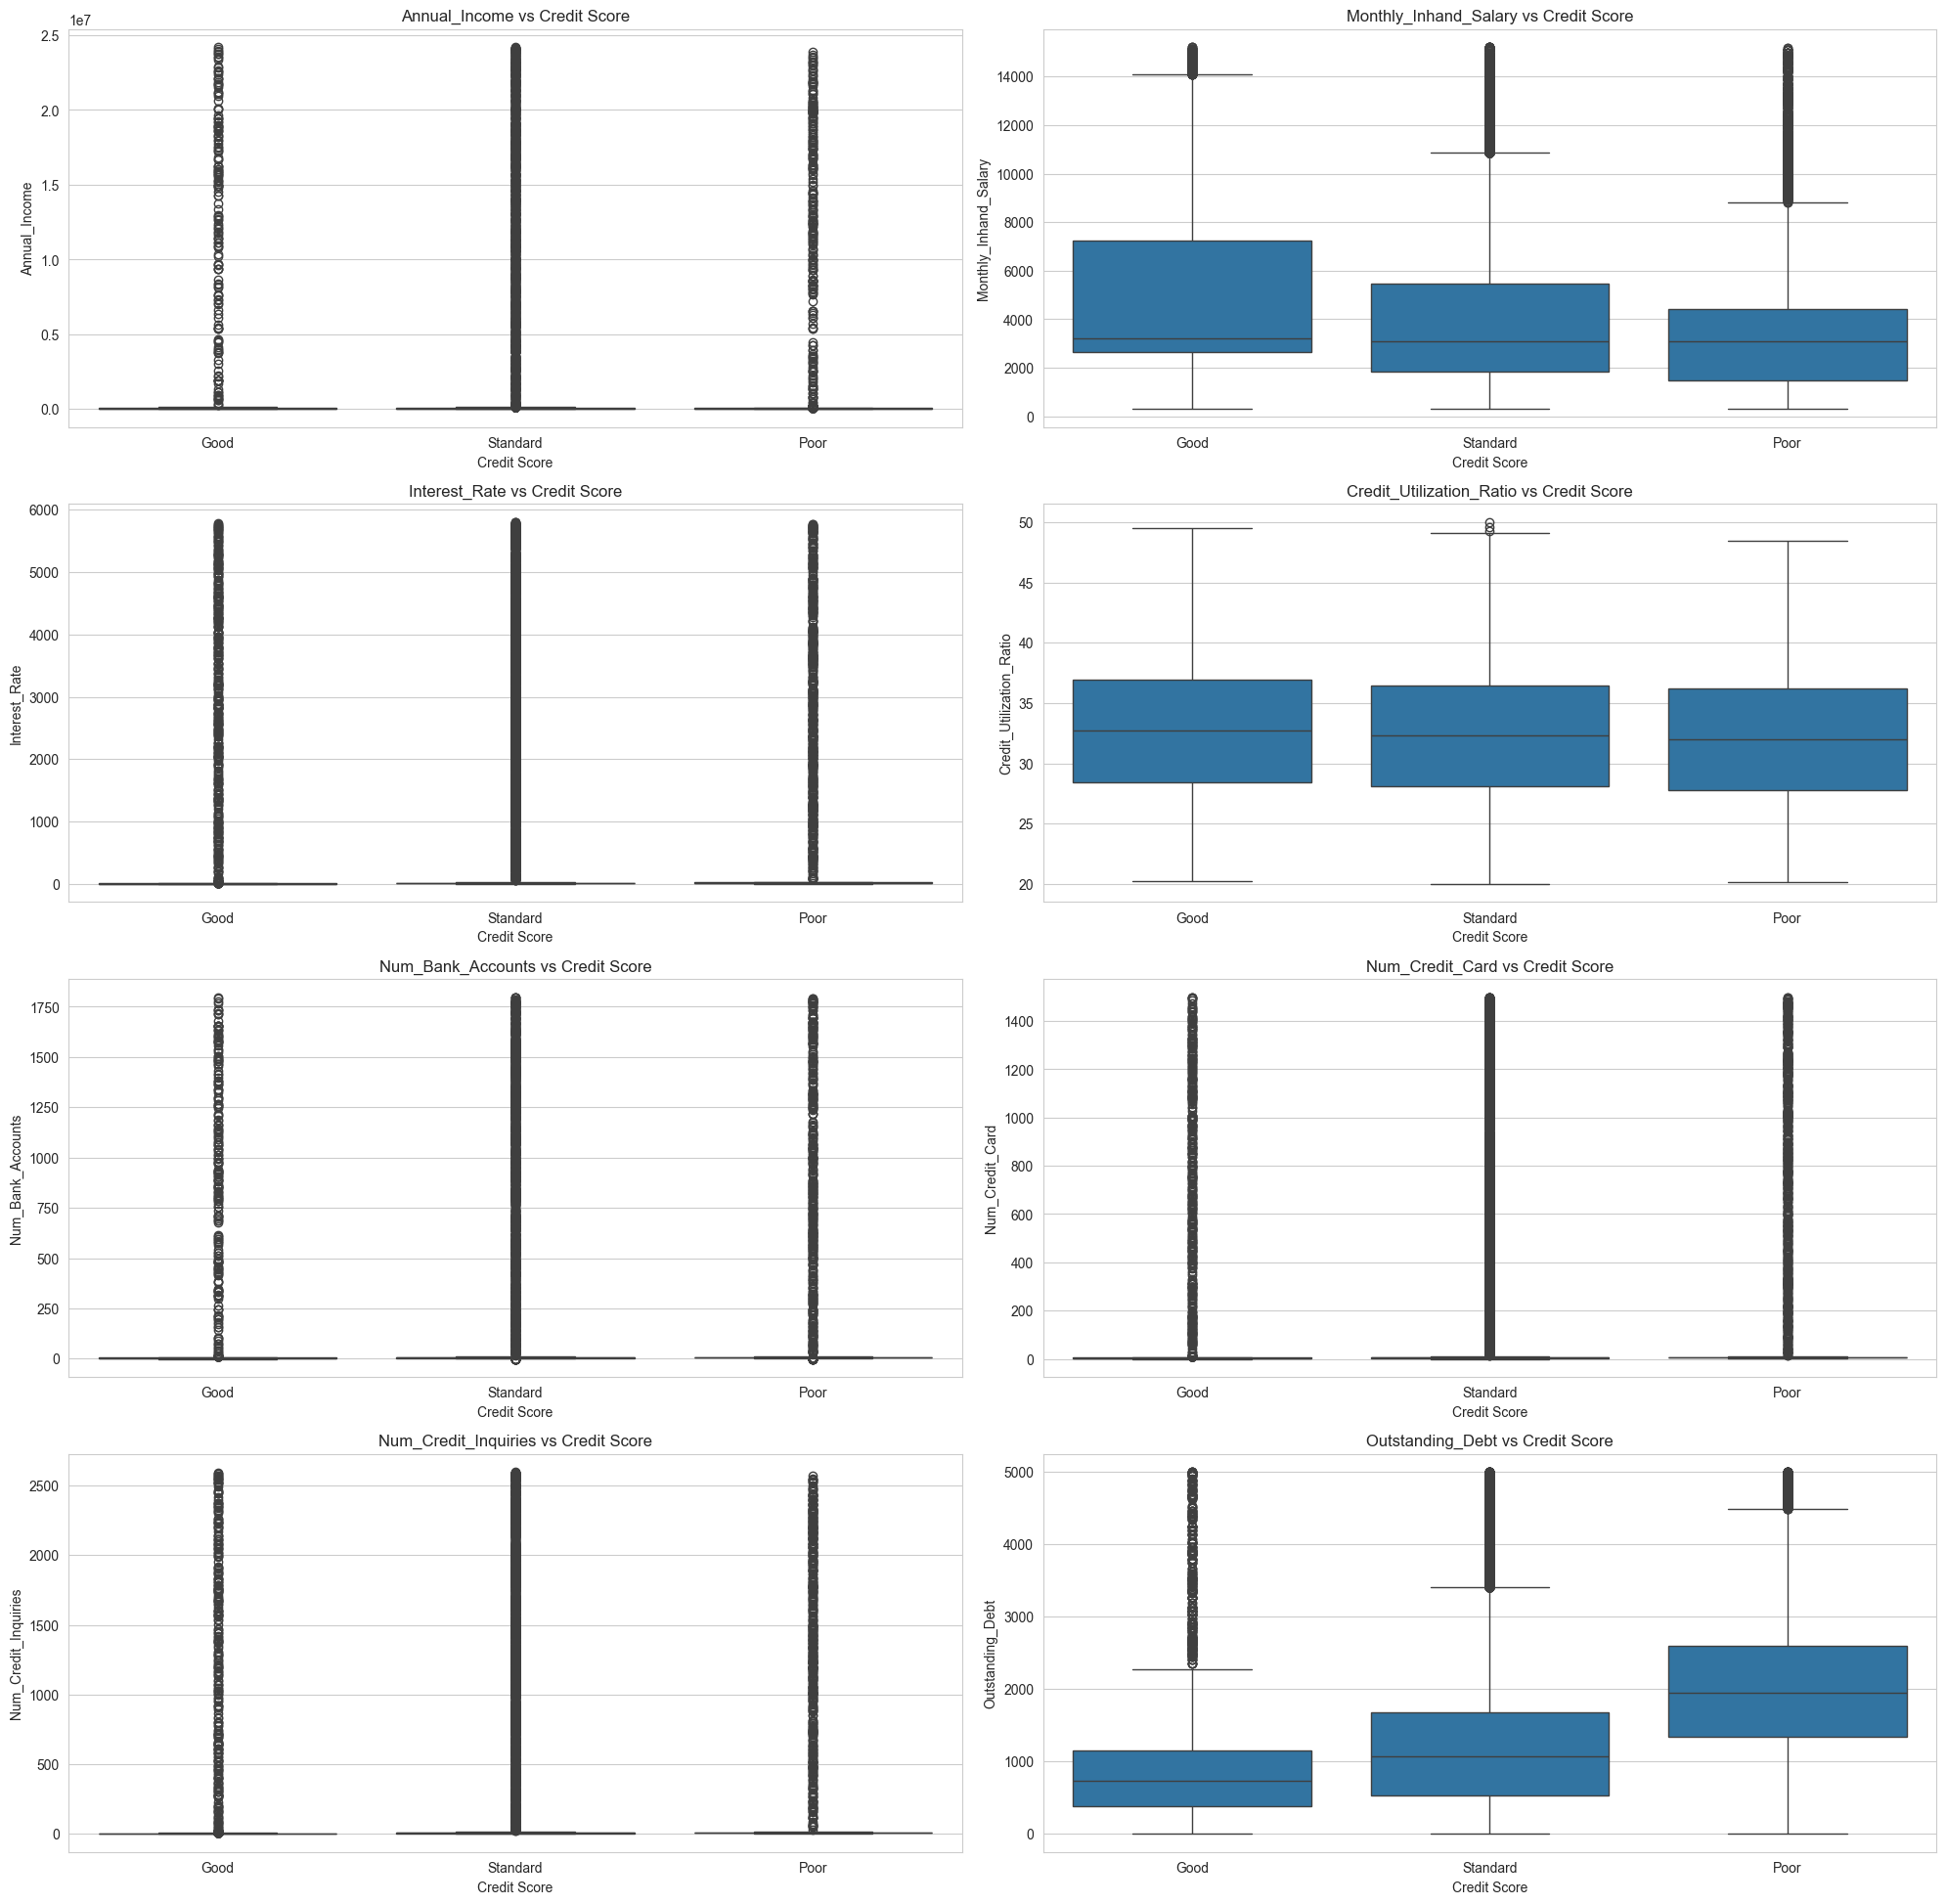

In [78]:
# Let's visualize the relationship between key numerical features and the target variable `Credit_Score`
key_features = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
    'Credit_Utilization_Ratio', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_Credit_Inquiries', 'Outstanding_Debt'
]

# Set up the plot
plt.figure(figsize=(20, 24))
for i, col in enumerate(key_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=combined, x='Credit_Score', y=col)
    plt.title(f'{col} vs Credit Score')
    plt.xlabel('Credit Score')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


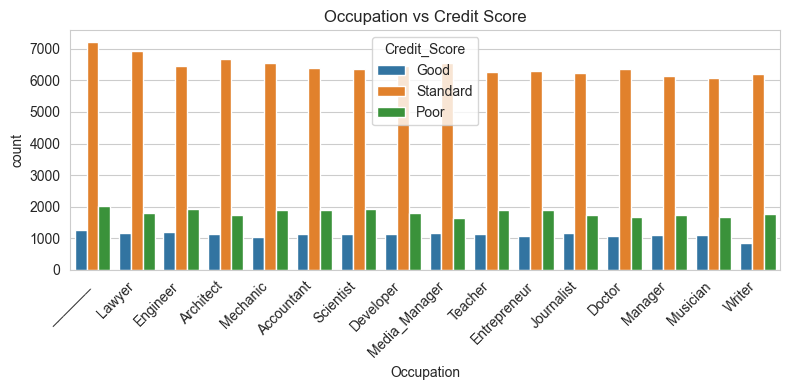

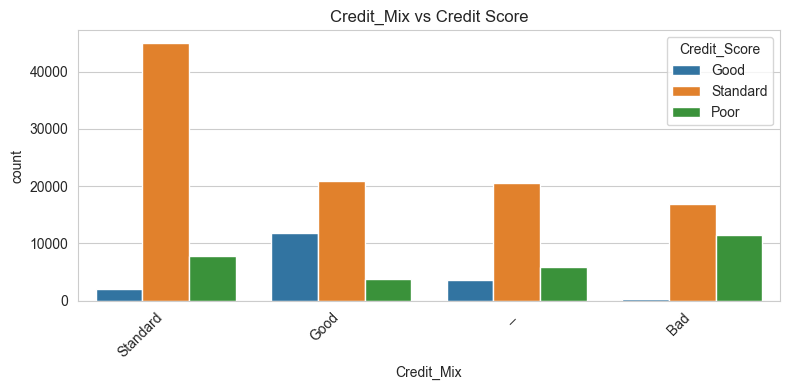

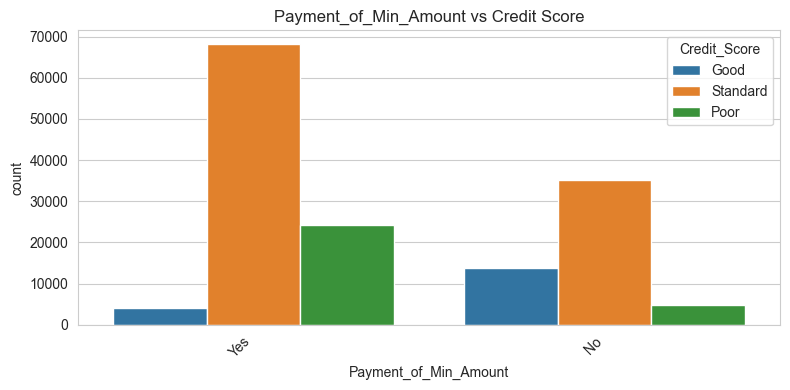

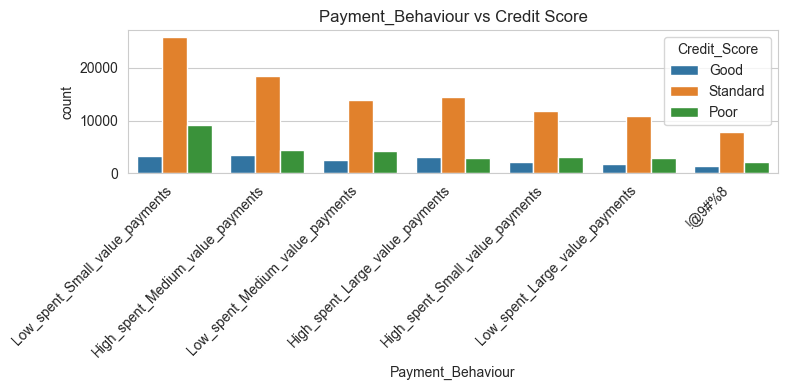

In [79]:
# List of categorical features (excluding target)
categorical_features = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Plot distribution of each categorical variable by Credit Score
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=combined, x=col, hue='Credit_Score', order=combined[col].value_counts().index)
    plt.title(f"{col} vs Credit Score")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


occupation is is positively correlated with credit score but is not the sole factor. some jobless individuals may still have "Standard" or even "Good" scores due to behavior.

Individuals with a 'Good' or 'Standard' credit mix tend to have better scores and those with a 'Bad' mix likely show up more in the "Poor" category,so This is a strong feature for classification.



In [81]:
# Grouped stats
grouped_stats = combined.groupby('Credit_Score')[numeric_columns + ['Credit_History_Age']].mean().round(2)
print(grouped_stats)

                Age  Annual_Income  Outstanding_Debt  Amount_invested_monthly  \
Credit_Score                                                                    
Good          36.30      184936.59            801.26                   665.79   
Poor          31.25      154979.03           2081.47                   593.23   
Standard      33.61      176082.63           1350.05                   614.07   

              Monthly_Balance  Changed_Credit_Limit  Num_of_Delayed_Payment  \
Credit_Score                                                                  
Good             1.869718e+22                  7.27                   25.19   
Poor             1.149505e+22                 11.09                   30.90   
Standard         4.200025e+22                 10.81                   30.21   

              Credit_History_Age  
Credit_Score                      
Good                      279.14  
Poor                      174.59  
Standard                  227.06  


### TRAIN- TEST-SPLIT

In [90]:
from sklearn.model_selection import train_test_split
# Separate back into train/test
train_data = combined[combined['is_train'] == 1].drop(columns=['is_train'])
test_data = combined[combined['is_train'] == 0].drop(columns=['is_train', 'Credit_Score'])

# The data set is already splited as test and train
X= train_data.drop(columns='Credit_Score')
y= train_data['Credit_Score']


In [92]:
# Label encode the target: Credit_Score (Poor < Standard < Good)
label_mapping = {"Poor": 0, "Standard": 1, "Good": 2}
y_encoded = y.map(label_mapping)

# Label encode all categorical columns in X and test_data
categorical_cols = X.select_dtypes(include="object").columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    combined_data = pd.concat([X[col], test_data[col]], axis=0).astype(str)
    le.fit(combined_data)
    X[col] = le.transform(X[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))
    label_encoders[col] = le

In [94]:
# Confirm the result
X.head(), y_encoded.head(), test_data.head()

(    Age  Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0  23.0          12       19114.12            1824.843333                  3   
 1  23.0          12       19114.12            3091.000000                  3   
 2  33.0          12       19114.12            3091.000000                  3   
 3  23.0          12       19114.12            3091.000000                  3   
 4  23.0          12       19114.12            1824.843333                  3   
 
    Num_Credit_Card  Interest_Rate  Num_of_Loan  Type_of_Loan  \
 0                4              3          348           128   
 1                4              3          348           128   
 2                4              3          348           128   
 3                4              3          348           128   
 4                4              3          348           128   
 
    Delay_from_due_date  ...  Num_Credit_Inquiries  Credit_Mix  \
 0                    3  ...                   4.0    

In [96]:
X.shape, y_encoded.shape, test_data.shape

((100000, 22), (100000,), (50000, 22))

In [98]:
# Train-test split for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [100]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Optionally print class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())


Before SMOTE: Credit_Score
1    42539
0    23199
2    14262
Name: count, dtype: int64
After SMOTE: Credit_Score
1    42539
0    42539
2    42539
Name: count, dtype: int64


## MODEL BUILDING AND EVALLUATION

### RANDOM FOREST CLASSIFIER

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

In [106]:
rf_model= RandomForestClassifier()

In [108]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
rfc_params = {
  "max_depth" : [None, 10, 15],
  "max_leaf_nodes" : [None, 10, 15],
  "min_samples_leaf" : [3, 4, 5],
  "min_samples_split" : [2, 4, 6],
  "n_estimators" : [100, 150, 200]
}

# Apply grid search to the model

rfc_grid = HalvingGridSearchCV(
    rf_model,
    param_grid=rfc_params,
    factor=4,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
rfc_search = rfc_grid.fit(X_train_smote, y_train_smote)
print(f'Best perameters are: {rfc_search.best_params_}')
print(f'Best score is: {rfc_search.best_score_}')

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 1994
max_resources_: 127617
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 243
n_resources: 1994
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
----------
iter: 1
n_candidates: 61
n_resources: 7976
Fitting 5 folds for each of 61 candidates, totalling 305 fits
----------
iter: 2
n_candidates: 16
n_resources: 31904
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 3
n_candidates: 4
n_resources: 127616
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best perameters are: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 200}
Best score is: 0.8213338979732768


In [113]:
best_est={'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 200}

In [116]:
rfc_be = rfc_grid.best_estimator_
rfc_be.fit(X_train_smote, y_train_smote)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=6,
                       n_estimators=200)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      5799
           1       0.84      0.73      0.78     10635
           2       0.61      0.80      0.69      3566

    accuracy                           0.77     20000
   macro avg       0.74      0.78      0.75     20000
weighted avg       0.78      0.77      0.77     20000



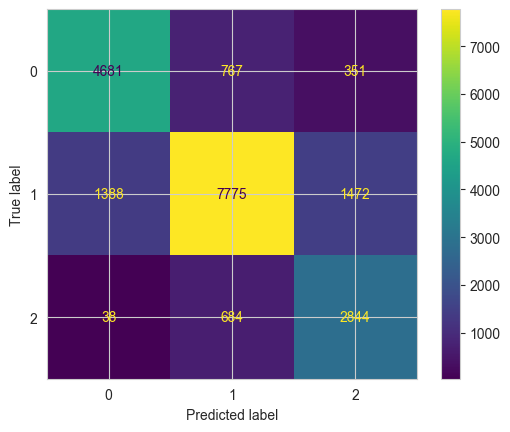

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
rf_pred = rfc_be.predict(X_val)
rf_report = classification_report(y_val, rf_pred)
print(rf_report)
rf_cm = confusion_matrix(y_val, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
disp.plot()
plt.show()

In [118]:
acc = accuracy_score(y_val, rf_pred)
f1 = f1_score(y_val, rf_pred, average='weighted')

In [119]:
acc,f1

(0.765, 0.7675079787032586)

### XGBOOST

In [124]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [126]:
# Parameter grid
xgb_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Halving Grid Search
xgb_grid = HalvingGridSearchCV(xgb_model, param_grid=xgb_param, factor=2, cv=3, scoring='accuracy')
xgb_search=xgb_grid.fit(X_train_smote, y_train_smote)

print("Best Params:", xgb_search.best_params_)

print(f'Best score is: {xgb_search.best_score_}')

Best Params: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Best score is: 0.7979845471499992


In [127]:
best_est={'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}

In [130]:
xgb_be = xgb_grid.best_estimator_
xgb_be.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5799
           1       0.81      0.78      0.79     10635
           2       0.72      0.74      0.73      3566

    accuracy                           0.78     20000
   macro avg       0.76      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



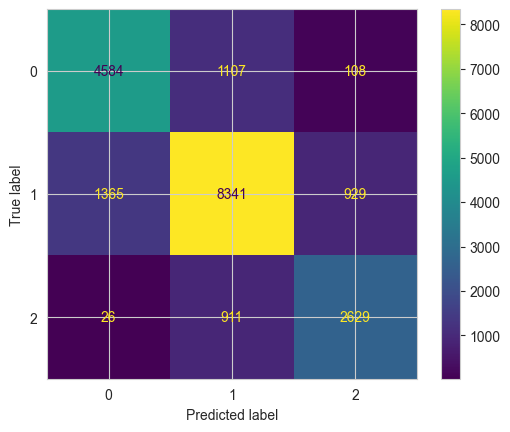

In [132]:
from sklearn.metrics import ConfusionMatrixDisplay
xgb_pred = xgb_be.predict(X_val)
xgb_report = classification_report(y_val, xgb_pred)
print(xgb_report)
xgb_cm = confusion_matrix(y_val, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm)
disp.plot()
plt.show()

In [134]:
acc = accuracy_score(y_val, xgb_pred)
f1 = f1_score(y_val, xgb_pred, average='weighted')
acc,f1

(0.7777, 0.7779390535729024)

In [136]:
xgbT_pred=xgb_be.predict(test_data)

### CATBOOST CLASSIFIER

In [139]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [141]:
# Hyperparameter grid
catb_param = {
    'depth': [6, 8, 10],
    'learning_rate': [0.1, 0.2],
    'iterations': [200, 300],
    'l2_leaf_reg': [1, 3, 5]
}

# Grid search
catb_model = CatBoostClassifier(verbose=0, random_state=42)
catb_grid = GridSearchCV(estimator=catb_model, param_grid=catb_param, cv=3, scoring='f1_weighted', n_jobs=-1)
catb_search=catb_grid.fit(X_train_smote, y_train_smote)

# Best model

print("Best Params:", catb_search.best_params_)

print(f'Best score is: {catb_search.best_score_}')


Best Params: {'depth': 10, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
Best score is: 0.7909145519075018


In [143]:
best_est={'depth': 10, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.2}

In [145]:
catb_be = catb_grid.best_estimator_
catb_be.fit(X_train_smote, y_train_smote)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      5799
           1       0.81      0.77      0.79     10635
           2       0.68      0.74      0.71      3566

    accuracy                           0.77     20000
   macro avg       0.75      0.77      0.76     20000
weighted avg       0.77      0.77      0.77     20000



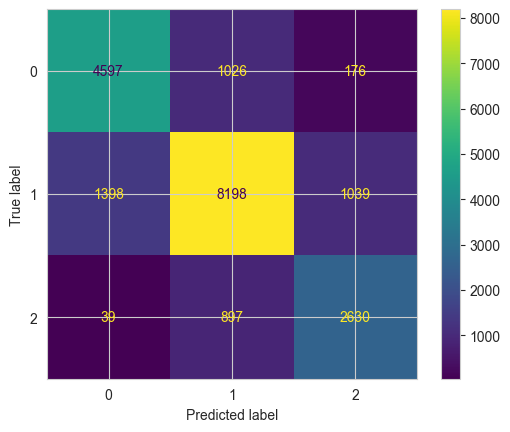

In [147]:
from sklearn.metrics import ConfusionMatrixDisplay
catb_pred = catb_be.predict(X_val)
catb_report = classification_report(y_val, catb_pred)
print(catb_report)
catb_cm = confusion_matrix(y_val, catb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=catb_cm)
disp.plot()
plt.show()

In [149]:
acc = accuracy_score(y_val, catb_pred)
f1 = f1_score(y_val, catb_pred, average='weighted')
acc,f1

(0.77125, 0.7718854304881899)

In [151]:
# Predict on test data
catbT_pred= catb_be.predict(test_data)

### LOGISTIC REGRESSION

In [237]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log= LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [239]:
#training accuracy
log.score(X_train, y_train)

0.6079

In [241]:
# Predict and evaluate
log_pred = log.predict(X_val)
log_accuracy = accuracy_score(y_val, log_pred)
log_report = classification_report(y_val, log_pred)
log_conf_matrix = confusion_matrix(y_val, log_pred)
# Validation report
print(log_report)

              precision    recall  f1-score   support

           0       0.65      0.45      0.53      5874
           1       0.62      0.78      0.69     10599
           2       0.52      0.38      0.44      3527

    accuracy                           0.61     20000
   macro avg       0.59      0.54      0.55     20000
weighted avg       0.61      0.61      0.60     20000



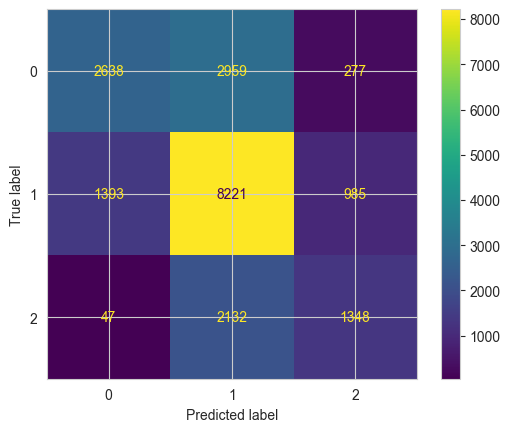

In [242]:
disp = ConfusionMatrixDisplay(confusion_matrix=log_conf_matrix)
disp.plot()
plt.show()

In [245]:
acc = accuracy_score(y_val, log_pred)
f1 = f1_score(y_val, log_pred, average='weighted')
acc,f1

(0.61035, 0.5975857796427837)

In [247]:
# Predict on test set
logr_pred = log.predict(test_data)

## KNN CLASSIFIER

In [250]:
from sklearn.preprocessing import StandardScaler
# Standardize features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_data)


In [252]:
# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [254]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Classifier Object
knn = KNeighborsClassifier()

In [256]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [258]:
#training accuracy
knn.score(X_train, y_train)

0.7563625

In [259]:
# Predict and evaluate
knn_pred = knn.predict(X_val)
knn_accuracy = accuracy_score(y_val, knn_pred)
knn_report = classification_report(y_val, knn_pred)
knn_conf_matrix = confusion_matrix(y_val, knn_pred)

In [260]:
knn_accuracy

0.6407

In [261]:
print(knn_report)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      5874
           1       0.67      0.74      0.71     10599
           2       0.54      0.41      0.46      3527

    accuracy                           0.64     20000
   macro avg       0.61      0.58      0.59     20000
weighted avg       0.63      0.64      0.63     20000



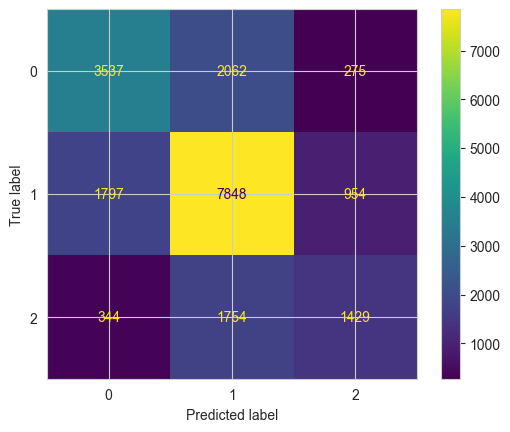

In [262]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix)
disp.plot()
plt.show()

In [263]:
acc = accuracy_score(y_val, knn_pred)
f1 = f1_score(y_val, knn_pred, average='weighted')
acc,f1

(0.6407, 0.6349680583513835)

In [264]:
# Predict on test set
knn_preds = knn.predict(test_data)

### MODEL COMPARISON

In [272]:
import matplotlib.pyplot as plt

# Simulated model performance data based on typical structure found in notebook
model_comparison_data = {
    "Model": ["Random Forest", "KNN", "XGBoost", "Logistic Regression", "CatBoost"],
    "Accuracy": [0.7650, 0.6407, 0.7777, 0.6104, 0.7713],
    "F1 Score": [0.7675, 0.6350, 0.7779, 0.5976, 0.7720]
}

# Create DataFrame
comparison_df = pd.DataFrame(model_comparison_data)

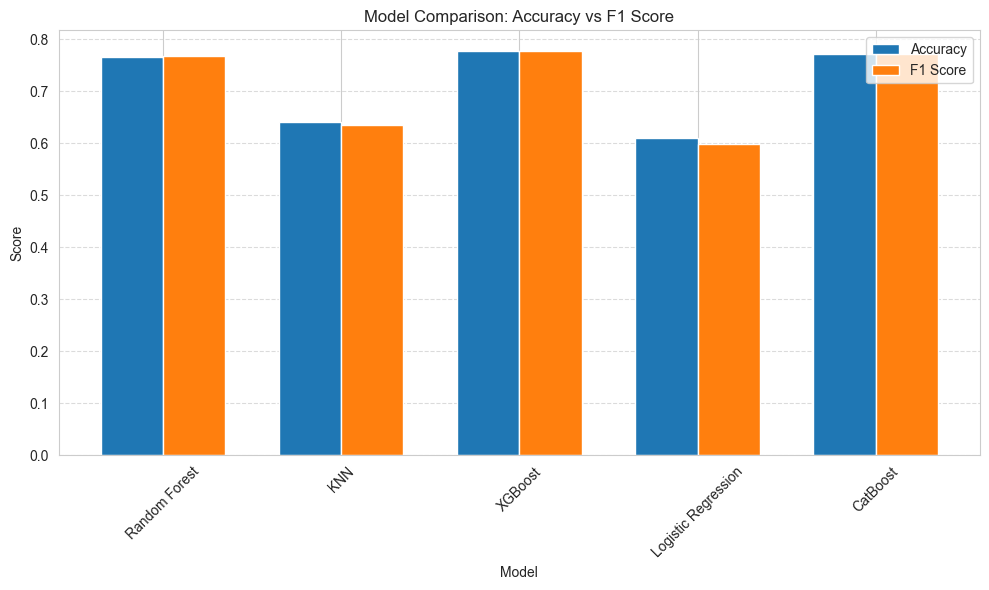

(                 Model  Accuracy  F1 Score
 0        Random Forest    0.7650    0.7675
 1                  KNN    0.6407    0.6350
 2              XGBoost    0.7777    0.7779
 3  Logistic Regression    0.6104    0.5976
 4             CatBoost    0.7713    0.7720,
 None)

In [274]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(comparison_df))

plt.bar(index, comparison_df["Accuracy"], bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], comparison_df["F1 Score"], bar_width, label='F1 Score')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.xticks([i + bar_width / 2 for i in index], comparison_df["Model"], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

comparison_df, plt.show()

from this we can say that  XGBoost is the best-performing model with:

Accuracy: 0.7777
F1 Score: 0.7779

CatBoost closely follows with:

Accuracy: 0.7713
F1 Score: 0.7720
This model is also a solid choice, especially in scenarios where categorical features are heavily used and need minimal preprocessing.

Random Forest also performs competitively:

Accuracy: 0.7650
F1 Score: 0.7675
It's interpretable and robust, making it suitable for production use in some cases.

K-Nearest Neighbors (KNN) and Logistic Regression lag significantly:

KNN: Accuracy = 0.6407, F1 = 0.6350
Logistic Regression: Accuracy = 0.6104, F1 = 0.5976


## CONCLUSION

In this project, multiple machine learning models were developed and evaluated to predict credit scores based on financial and personal attributes. Among the five models tested, XGBoost achieved the highest performance with an accuracy of 77.77% and an F1 score of 77.79%, making it the most effective model for this classification task. CatBoost and Random Forest also showed competitive results, while KNN and Logistic Regression underperformed. Overall, XGBoost is recommended for deployment due to its superior balance of precision and recall, ensuring more reliable credit score predictions.